Import necessary Package

In [8]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta as dt

In [2]:
Path1 ="C:/Users/ranga/Downloads/takehome_user_engagement.csv"
Path2 = "C:/Users/ranga\Downloads/takehome_users_1.csv"


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


# Identifying Adopted Users using user_engagement Data Set

In [21]:
User_Eng = pd.read_csv(Path1)
User_Eng.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [106]:
User_Eng.info()
User_Eng['time_stamp'] = User_Eng['time_stamp'].astype('datetime64[ns]')
User_Eng['time_stamp'] = pd.to_datetime(User_Eng.time_stamp.dt.date) 

User_Eng.info()
User_Eng.sort_values(['user_id','time_stamp'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


,time_stamp,user_id,visited
0,2014-04-22,1,1
1,2013-11-15,2,1
2,2013-11-29,2,1
3,2013-12-09,2,1
4,2013-12-25,2,1
...,...,...,...
207912,2013-09-06,11996,1
207913,2013-01-15,11997,1
207914,2014-04-27,11998,1
207915,2012-06-02,11999,1


In [114]:
User_Eng.time_stamp.max()

Timestamp('2014-06-06 00:00:00')

In [11]:
User_Count = User_Eng.user_id.unique()  # Getting Unique Id
User_Count

array([    1,     2,     3, ..., 11998, 11999, 12000], dtype=int64)

For loop to Identify the Adpted User

In [62]:
Is_Adpt_Usr = []

for id in User_Count:
    A = User_Eng.loc[User_Eng['user_id'] == id,'time_stamp'].to_numpy(dtype='datetime64[D]')
    B = A + np.timedelta64(6, 'D')
    Adpoted_User =1 if max([1 if np.where(A[i:] <= B[i],1,0).tolist().count(1) >= 3 else 0 for i in range(0,B.size)]) == 1 else 0
    Is_Adpt_Usr.append(Adpoted_User)
    

In [63]:
Adopted_User_dict = {"User_id":User_Count.tolist(),"Adopted_User":Is_Adpt_Usr}
Adopted_User_DF = pd.DataFrame(Adopted_User_dict)
Adopted_User_DF.head(10)

,User_id,Adopted_User
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,10,1
8,11,0
9,13,0


In [64]:
Adopted_User_DF.Adopted_User.value_counts()

0    7221
1    1602
Name: Adopted_User, dtype: int64

In [65]:
Adopted_User_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   User_id       8823 non-null   int64
 1   Adopted_User  8823 non-null   int64
dtypes: int64(2)
memory usage: 138.0 KB


# Preparing User_Dataset

In [162]:
Users = pd.read_csv(Path2,encoding = 'utf-8')
Users['User_id'] = Users['object_id']
Users.drop('object_id',axis = 1,inplace = True)
Users


,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,User_id
0,22-04-2014 03:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1
1,15-11-2013 03:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2
2,19-03-2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3
3,21-05-2013 08:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4
4,17-01-2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5
...,...,...,...,...,...,...,...,...,...,...
11995,06-09-2013 06:14,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,11996
11996,10-01-2013 18:28,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,11997
11997,27-04-2014 12:45,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,11998
11998,31-05-2012 11:55,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,11999


In [163]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               12000 non-null  object 
 1   name                        12000 non-null  object 
 2   email                       12000 non-null  object 
 3   creation_source             12000 non-null  object 
 4   last_session_creation_time  8823 non-null   float64
 5   opted_in_to_mailing_list    12000 non-null  int64  
 6   enabled_for_marketing_drip  12000 non-null  int64  
 7   org_id                      12000 non-null  int64  
 8   invited_by_user_id          6417 non-null   float64
 9   User_id                     12000 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


Correcting Format

In [164]:
Users.creation_time = Users.creation_time.astype('datetime64[ns]')
Users.creation_time = pd.to_datetime(Users.creation_time.dt.date)
Users.creation_time
Users['last_session_creation_time'] = pd.to_datetime(Users['last_session_creation_time'] ,unit='s')
#Users.last_session_creation_time = Users.last_session_creation_time.astype('datetime64[ns]')
Users.last_session_creation_time = pd.to_datetime(Users.last_session_creation_time.dt.date)
Users.last_session_creation_time

0       2014-04-22
1       2014-03-31
2       2013-03-19
3       2013-05-22
4       2013-01-22
           ...    
11995   2013-09-06
11996   2013-01-15
11997   2014-04-27
11998   2012-06-02
11999   2014-01-26
Name: last_session_creation_time, Length: 12000, dtype: datetime64[ns]

In [205]:
# Joining the Tables
DF_Users = Users.join(Adopted_User_DF.set_index('User_id'), on = 'User_id', how='left')
DF_Users

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,User_id,Adopted_User
0,2014-04-22,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22,1,0,11,10803.0,1,0.0
1,2013-11-15,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31,0,0,1,316.0,2,1.0
2,2013-03-19,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19,0,0,94,1525.0,3,0.0
3,2013-05-21,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22,0,0,1,5151.0,4,0.0
4,2013-01-17,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22,0,0,193,5240.0,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11995,2013-06-09,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06,0,0,89,8263.0,11996,0.0
11996,2013-10-01,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15,0,0,200,NaN,11997,0.0
11997,2014-04-27,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27,1,1,83,8074.0,11998,0.0
11998,2012-05-31,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02,0,0,6,NaN,11999,0.0


In [166]:
DF_Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   name                        12000 non-null  object        
 2   email                       12000 non-null  object        
 3   creation_source             12000 non-null  object        
 4   last_session_creation_time  8823 non-null   datetime64[ns]
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          6417 non-null   float64       
 9   User_id                     12000 non-null  int64         
 10  Adopted_User                8823 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)


In [206]:
DF_Users.Adopted_User.isnull().sum()

3177

# Important inference noticed !!

The non null of Adpoted_User Column & last_session_creation_time are same.
which means 3177 users are logging in for the first time or creating account for the first time
we cannot predict or assume if the user is adopted or not when they are using the account for the first time.
Its better to drop those rows.

In [207]:
DF_Users = DF_Users.loc[~DF_Users.Adopted_User.isna(),:]
DF_Users.shape

(8823, 11)

In [208]:
Missing_Invited = DF_Users.invited_by_user_id.isnull().sum()/DF_Users.shape[0]
Missing_Invited


0.4586875212512751

# Remove some features thats not important

* Since invited_by_user_id is missing 45% of the data it is impossible fill those missing data  & its better to drop that column
* All the columns that have unique id can be removed (name,email,user_id)
* Drop last_session_creation_time because it was used to created adopted User

# Adding New col to find the How old the account is

* Difference b/w Current Date and creation_time
* Drop creation_time

In [209]:
DF_Users

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,User_id,Adopted_User
0,2014-04-22,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22,1,0,11,10803.0,1,0.0
1,2013-11-15,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31,0,0,1,316.0,2,1.0
2,2013-03-19,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19,0,0,94,1525.0,3,0.0
3,2013-05-21,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22,0,0,1,5151.0,4,0.0
4,2013-01-17,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22,0,0,193,5240.0,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11995,2013-06-09,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06,0,0,89,8263.0,11996,0.0
11996,2013-10-01,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15,0,0,200,NaN,11997,0.0
11997,2014-04-27,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27,1,1,83,8074.0,11998,0.0
11998,2012-05-31,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02,0,0,6,NaN,11999,0.0


In [210]:
# ADdding New Column
DF_Users['Account_Age'] = (User_Eng.time_stamp.max() - DF_Users.creation_time).dt.days
# Dropping unnesecerry columns
DF_Users.drop(['name','email','User_id','invited_by_user_id','creation_time','last_session_creation_time'],axis = 1,inplace = True)

#User_Eng.time_stamp.max()
#DF_Users.creation_time

C:\Users\ranga\AppData\Local\Temp\ipykernel_13936\664295824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Users['Account_Age'] = (User_Eng.time_stamp.max() - DF_Users.creation_time).dt.days
C:\Users\ranga\AppData\Local\Temp\ipykernel_13936\664295824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Users.drop(['name','email','User_id','invited_by_user_id','creation_time','last_session_creation_time'],axis = 1,inplace = True)


In [211]:
DF_Users

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,Adopted_User,Account_Age
0,GUEST_INVITE,1,0,11,0.0,45
1,ORG_INVITE,0,0,1,1.0,203
2,ORG_INVITE,0,0,94,0.0,444
3,GUEST_INVITE,0,0,1,0.0,381
4,GUEST_INVITE,0,0,193,0.0,505
...,...,...,...,...,...,...
11995,ORG_INVITE,0,0,89,0.0,362
11996,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,248
11997,GUEST_INVITE,1,1,83,0.0,40
11998,PERSONAL_PROJECTS,0,0,6,0.0,736


In [212]:
DF_Users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             8823 non-null   object 
 1   opted_in_to_mailing_list    8823 non-null   int64  
 2   enabled_for_marketing_drip  8823 non-null   int64  
 3   org_id                      8823 non-null   int64  
 4   Adopted_User                8823 non-null   float64
 5   Account_Age                 8823 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 482.5+ KB


# One Hot Encoding of Creation_Source

In [213]:
Creation_Source = DF_Users.creation_source.unique()
Creation_Source
User_Creation_Source = np.array(DF_Users.creation_source)
User_Creation_Source
Creation_Source

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [214]:
rows = []
for i in DF_Users.creation_source:
    row = [1 if j == i else 0 for j in Creation_Source]
    rows.append(row)
rows

Creation_Source_DF = pd.DataFrame(rows, columns = Creation_Source)
Creation_Source_DF

,GUEST_INVITE,ORG_INVITE,SIGNUP,PERSONAL_PROJECTS,SIGNUP_GOOGLE_AUTH
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
8818,0,1,0,0,0
8819,0,0,0,0,1
8820,1,0,0,0,0
8821,0,0,0,1,0


In [215]:
print(DF_Users.shape,Creation_Source_DF.shape)

(8823, 6) (8823, 5)


In [216]:
#DF_Users = DF_Users.reset_index()
DF_Users

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,Adopted_User,Account_Age
0,GUEST_INVITE,1,0,11,0.0,45
1,ORG_INVITE,0,0,1,1.0,203
2,ORG_INVITE,0,0,94,0.0,444
3,GUEST_INVITE,0,0,1,0.0,381
4,GUEST_INVITE,0,0,193,0.0,505
...,...,...,...,...,...,...
11995,ORG_INVITE,0,0,89,0.0,362
11996,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,248
11997,GUEST_INVITE,1,1,83,0.0,40
11998,PERSONAL_PROJECTS,0,0,6,0.0,736


In [220]:
DF_Users.reset_index(drop = True,inplace = True)
DF_Users

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,Adopted_User,Account_Age
0,GUEST_INVITE,1,0,11,0.0,45
1,ORG_INVITE,0,0,1,1.0,203
2,ORG_INVITE,0,0,94,0.0,444
3,GUEST_INVITE,0,0,1,0.0,381
4,GUEST_INVITE,0,0,193,0.0,505
...,...,...,...,...,...,...
8818,ORG_INVITE,0,0,89,0.0,362
8819,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,248
8820,GUEST_INVITE,1,1,83,0.0,40
8821,PERSONAL_PROJECTS,0,0,6,0.0,736


In [224]:
DF_User_Copy = pd.concat([DF_Users,Creation_Source_DF],axis = 1)
DF_User_Copy.shape
DF_User_Copy.drop('creation_source',axis = 1,inplace = True)
DF_User_Copy

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,Adopted_User,Account_Age,GUEST_INVITE,ORG_INVITE,SIGNUP,PERSONAL_PROJECTS,SIGNUP_GOOGLE_AUTH
0,1,0,11,0.0,45,1,0,0,0,0
1,0,0,1,1.0,203,0,1,0,0,0
2,0,0,94,0.0,444,0,1,0,0,0
3,0,0,1,0.0,381,1,0,0,0,0
4,0,0,193,0.0,505,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8818,0,0,89,0.0,362,0,1,0,0,0
8819,0,0,200,0.0,248,0,0,0,0,1
8820,1,1,83,0.0,40,1,0,0,0,0
8821,0,0,6,0.0,736,0,0,0,1,0


In [232]:
# Correlation
Corr_DF = DF_User_Copy.corr()
Corr_DF

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,Adopted_User,Account_Age,GUEST_INVITE,ORG_INVITE,SIGNUP,PERSONAL_PROJECTS,SIGNUP_GOOGLE_AUTH
opted_in_to_mailing_list,1.000000,0.488219,-0.002421,0.006650,-0.006669,-0.005193,0.011235,0.002632,-0.005339,-0.008198
enabled_for_marketing_drip,0.488219,1.000000,0.000538,0.002058,-0.002562,-0.007691,0.009502,0.011159,-0.018095,-0.003042
org_id,-0.002421,0.000538,1.000000,0.074744,0.000547,0.001533,-0.018061,0.015432,0.010924,-0.003645
Adopted_User,0.006650,0.002058,0.074744,1.000000,0.104698,0.054847,-0.015820,-0.036937,0.026429,-0.015741
Account_Age,-0.006669,-0.002562,0.000547,0.104698,1.000000,0.015126,-0.009479,-0.012812,0.010460,0.002928
GUEST_INVITE,-0.005193,-0.007691,0.001533,0.054847,0.015126,1.000000,-0.352386,-0.245270,-0.144249,-0.202164
ORG_INVITE,0.011235,0.009502,-0.018061,-0.015820,-0.009479,-0.352386,1.000000,-0.393777,-0.231589,-0.324570
SIGNUP,0.002632,0.011159,0.015432,-0.036937,-0.012812,-0.245270,-0.393777,1.000000,-0.161192,-0.225910
PERSONAL_PROJECTS,-0.005339,-0.018095,0.010924,0.026429,0.010460,-0.144249,-0.231589,-0.161192,1.000000,-0.132863
SIGNUP_GOOGLE_AUTH,-0.008198,-0.003042,-0.003645,-0.015741,0.002928,-0.202164,-0.324570,-0.225910,-0.132863,1.000000


In [227]:
import seaborn as sns

<AxesSubplot:>

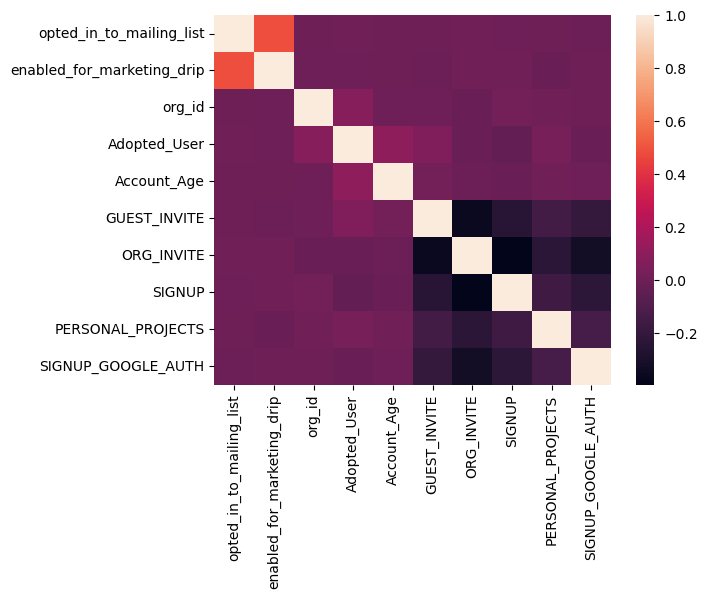

In [229]:
sns.heatmap(DF_User_Copy.corr()) # to view correlation

# From the above Correlation Matrix there is no correlation between the Target Col(Adopted_User) and the Features.